In [81]:
# !pip install pandas
# !pip install matplotlib
# !pip install scipy
# !pip install seaborn 

Python(88679) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
55499.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns



In [167]:
Data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [168]:
Data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [137]:
cols = Data.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn'])
cols_num = Data.select_dtypes(include=['float64', 'int64']).columns

/var/folders/gl/2fv89yts3n327b0jbg6btng40000gn/T/ipykernel_14575/109614938.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cols = Data.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn'])


## Statistical analysis

In [138]:
def plot_churn_by_category(column):
    churn_counts = pd.crosstab(Data[column], Data['Churn'], normalize='index') 
    churn_counts.plot(kind='bar', figsize=(10, 6), color=['#ff9999','#66b3ff'],)
    plt.title(f'Customer Churn Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
   
    plt.legend(title='Churn', loc='upper right')
    plt.show()

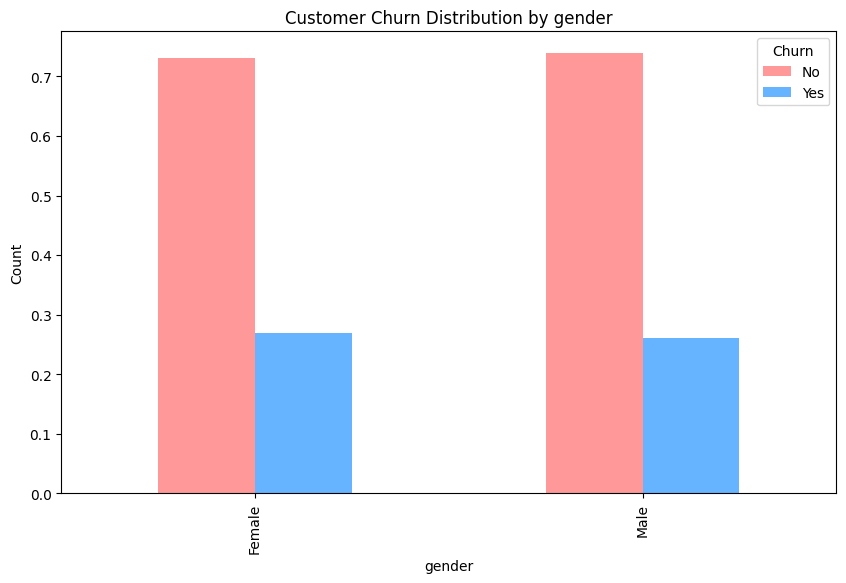

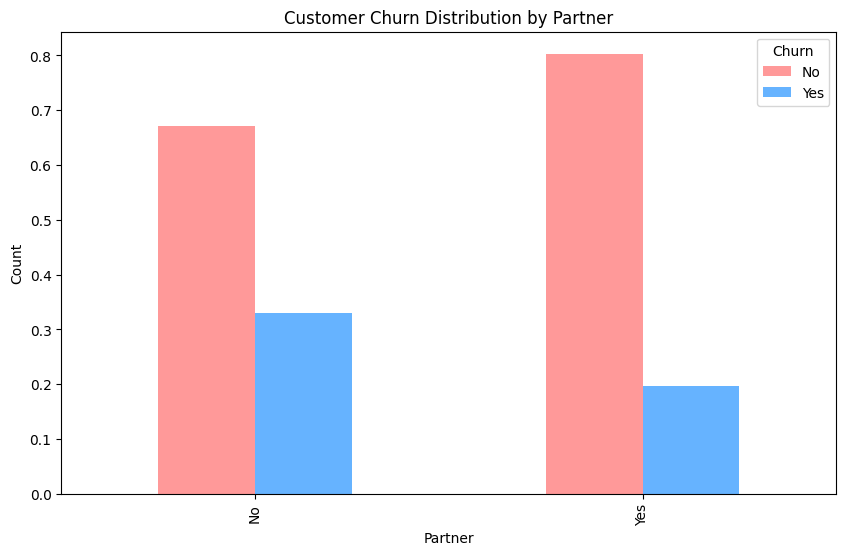

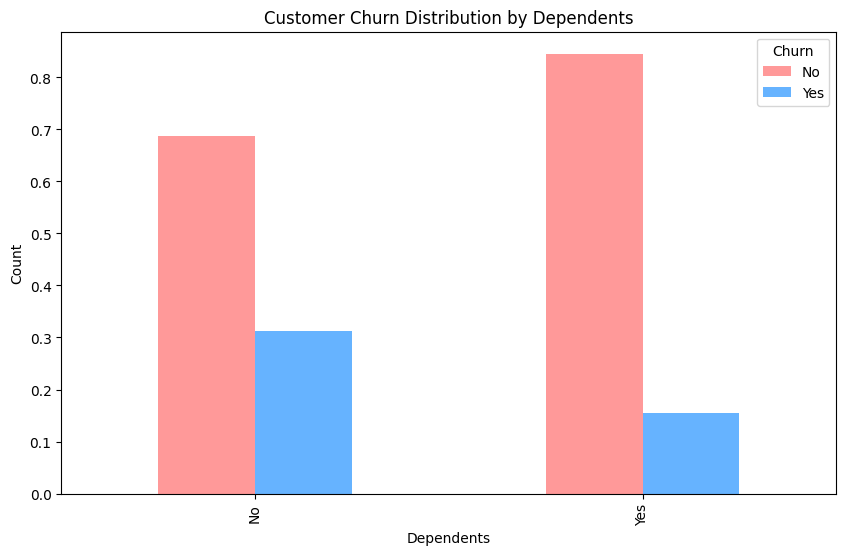

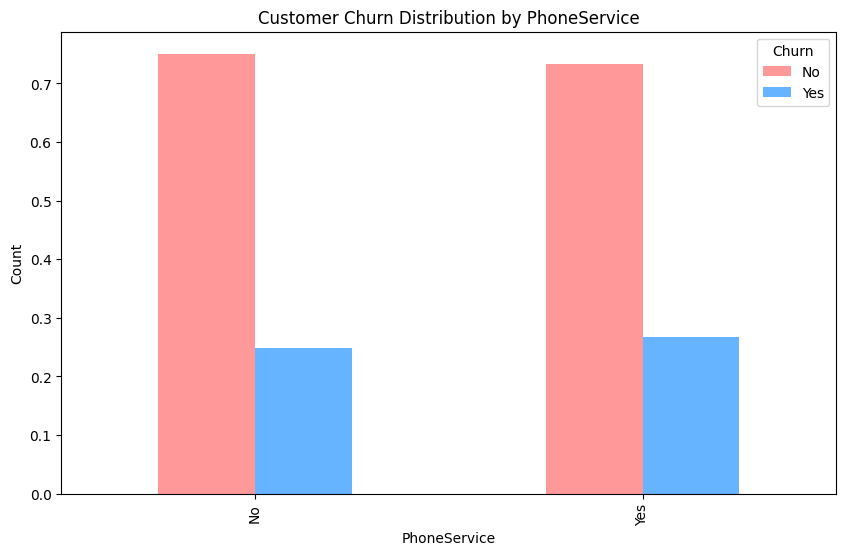

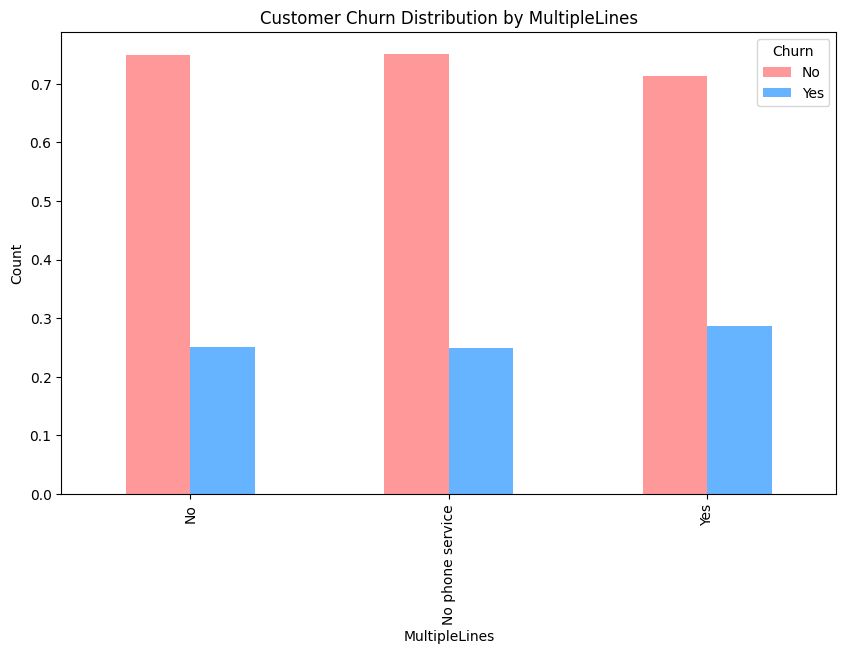

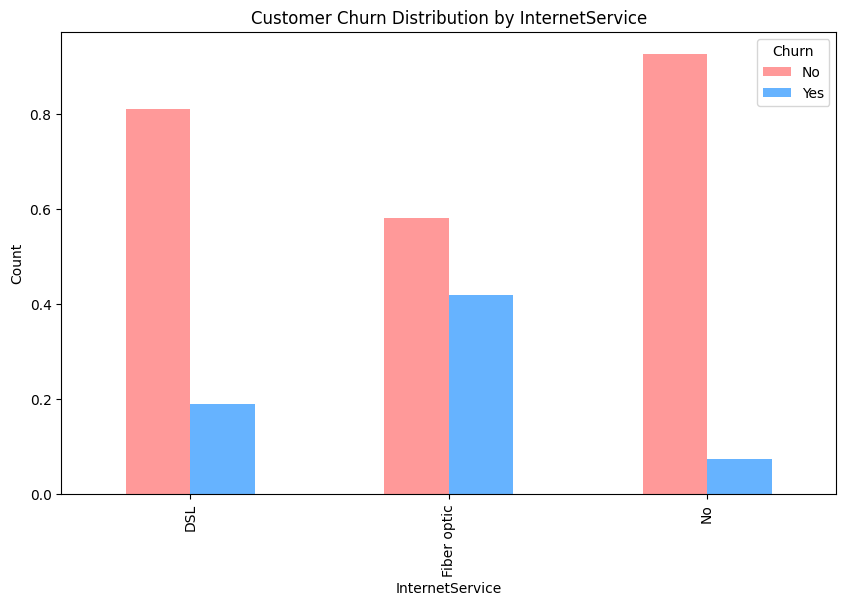

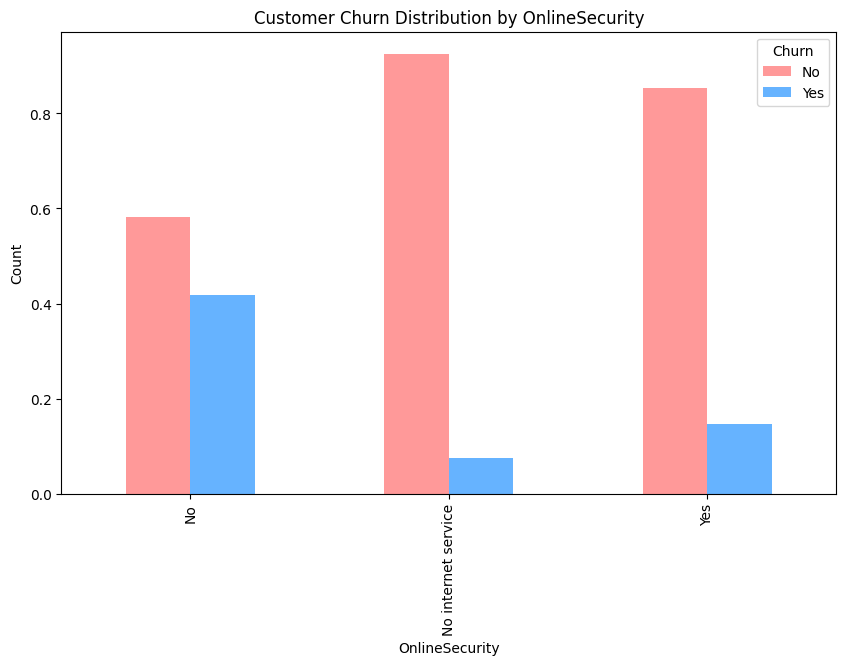

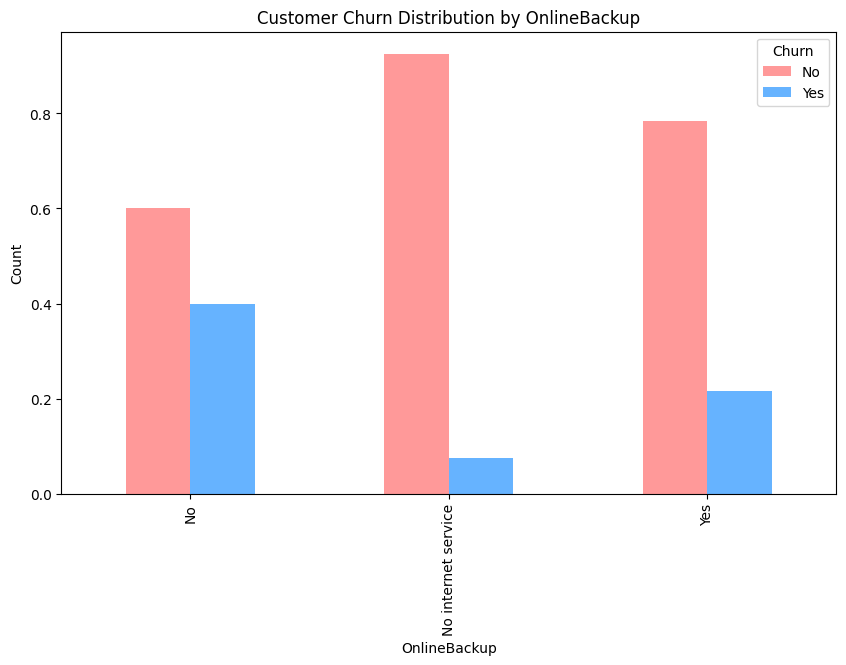

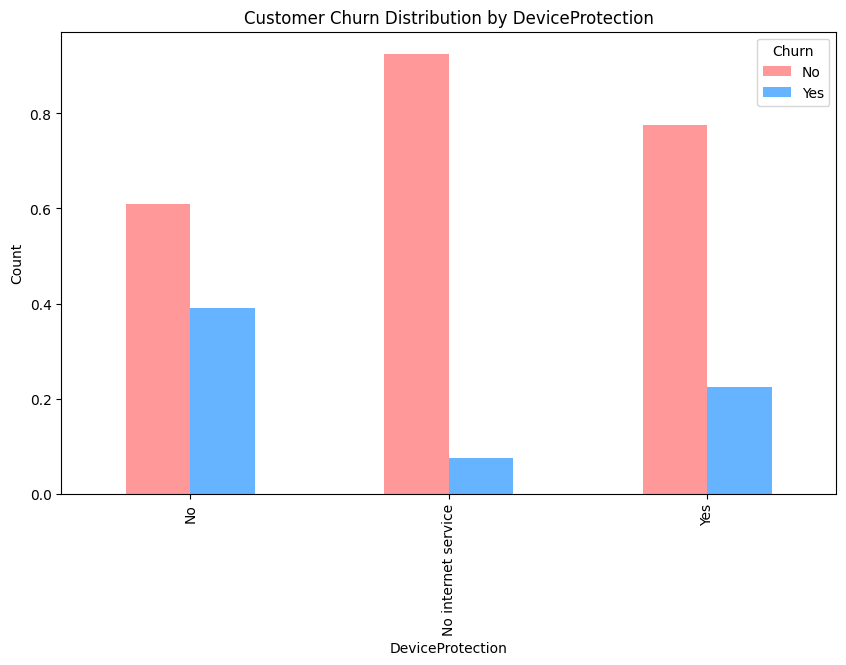

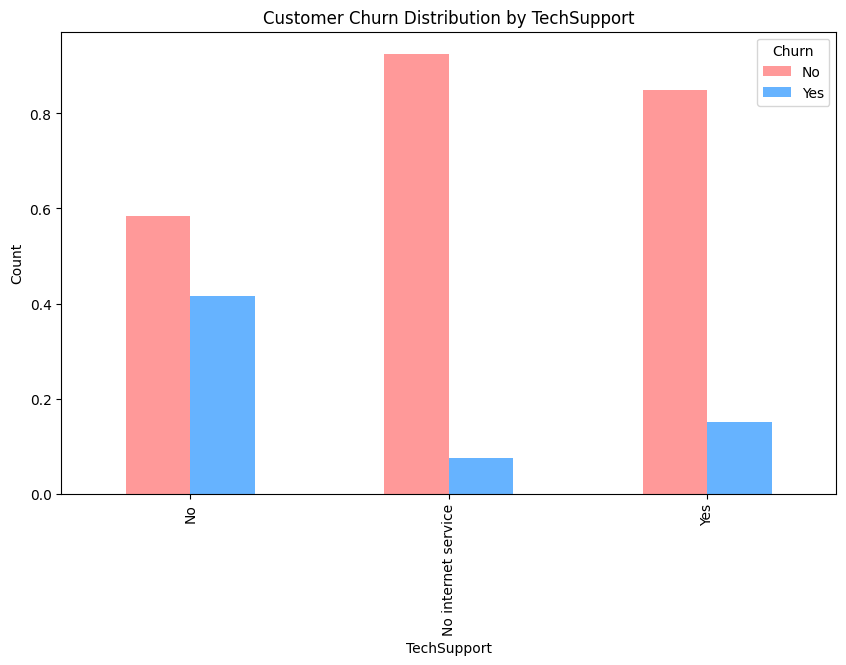

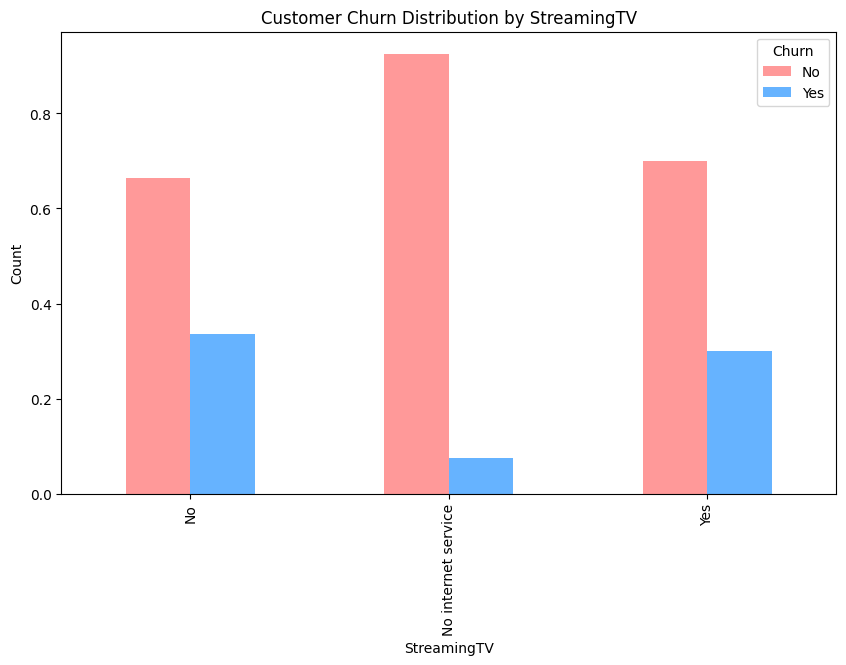

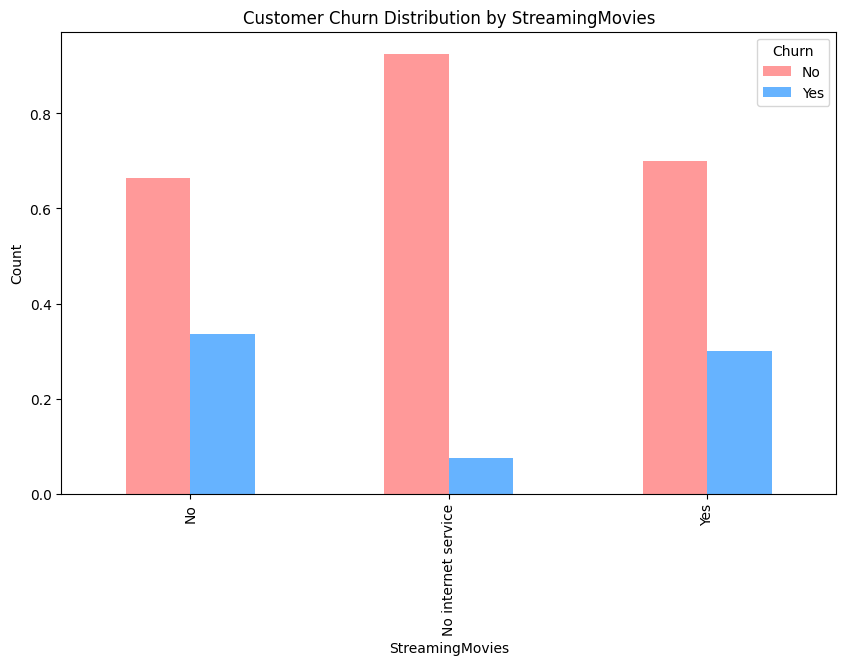

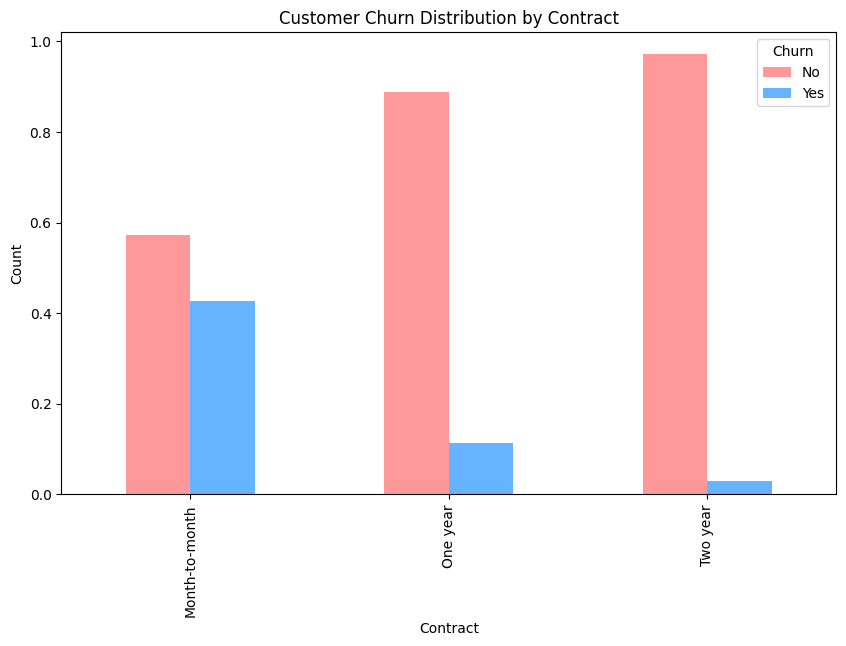

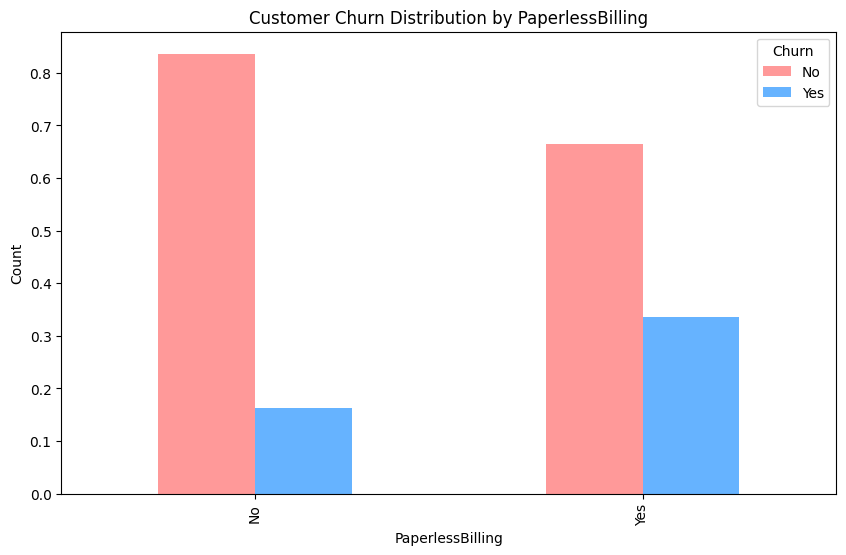

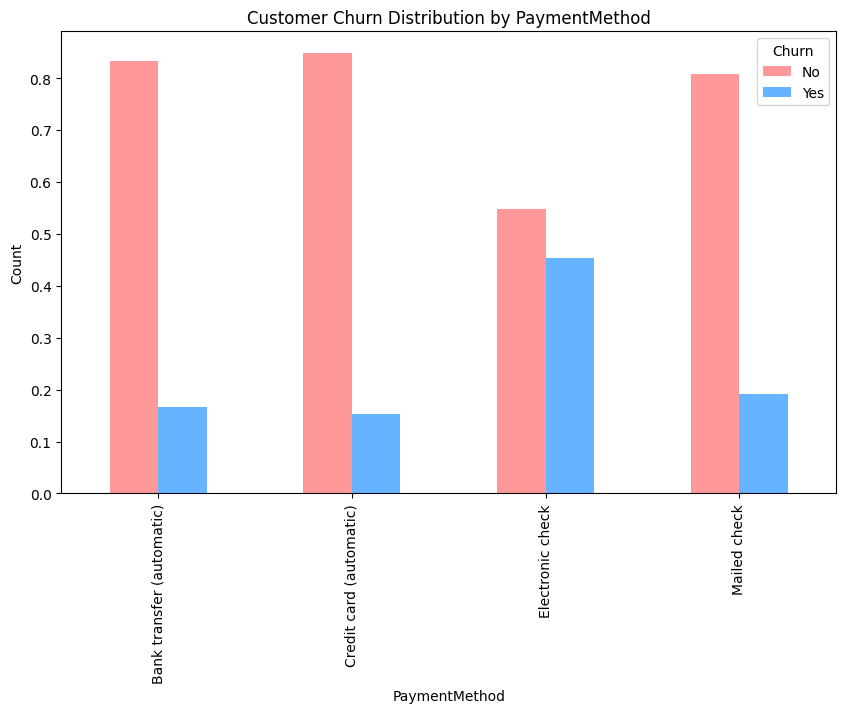

In [139]:


for col in cols:
    plot_churn_by_category(col)


In [153]:
def perform_chi_square_test(column):
    contingency_table = pd.crosstab(Data[column], Data['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square Test for {column}:')
    print(f'Chi2 Statistic: {chi2:.4f}, p-value: {p}\n')
    return float(f"{p:.4f}")

In [154]:
def perform_T_test(column):
    group1 = Data[Data['Churn'] == 'Yes'][column].astype(float)
    group2 = Data[Data['Churn'] == 'No'][column].astype(float)
    t_stat, p_value = ttest_ind(group1, group2)
    print(f'T-test for {column}:')
    print(f'T-statistic: {t_stat:.4f}, p-value: {p_value}\n')
    return float(f"{p_value:.4f}")

In [155]:

p_dict = {}
for col in cols:
    p = perform_chi_square_test(col)
    p_dict[col] = p



Chi-Square Test for gender:
Chi2 Statistic: 0.4841, p-value: 0.48657873605618596

Chi-Square Test for Partner:
Chi2 Statistic: 158.7334, p-value: 2.139911344075994e-36

Chi-Square Test for Dependents:
Chi2 Statistic: 189.1292, p-value: 4.924921661215422e-43

Chi-Square Test for PhoneService:
Chi2 Statistic: 0.9150, p-value: 0.3387825358066928

Chi-Square Test for MultipleLines:
Chi2 Statistic: 11.3304, p-value: 0.0034643829548773003

Chi-Square Test for InternetService:
Chi2 Statistic: 732.3096, p-value: 9.571788222840544e-160

Chi-Square Test for OnlineSecurity:
Chi2 Statistic: 849.9990, p-value: 2.661149635176552e-185

Chi-Square Test for OnlineBackup:
Chi2 Statistic: 601.8128, p-value: 2.079759216086427e-131

Chi-Square Test for DeviceProtection:
Chi2 Statistic: 558.4194, p-value: 5.505219496457244e-122

Chi-Square Test for TechSupport:
Chi2 Statistic: 828.1971, p-value: 1.4430840279998987e-180

Chi-Square Test for StreamingTV:
Chi2 Statistic: 374.2039, p-value: 5.528994485739183e-8

In [156]:
p_dict

{'gender': 0.4866,
 'Partner': 0.0,
 'Dependents': 0.0,
 'PhoneService': 0.3388,
 'MultipleLines': 0.0035,
 'InternetService': 0.0,
 'OnlineSecurity': 0.0,
 'OnlineBackup': 0.0,
 'DeviceProtection': 0.0,
 'TechSupport': 0.0,
 'StreamingTV': 0.0,
 'StreamingMovies': 0.0,
 'Contract': 0.0,
 'PaperlessBilling': 0.0,
 'PaymentMethod': 0.0}

In [157]:

for col in cols_num:
    p = perform_T_test(col)
    p_dict[col] = p


T-test for SeniorCitizen:
T-statistic: 12.8079, p-value: 3.839860055784785e-37

T-test for tenure:
T-statistic: -31.5796, p-value: 7.999057960590132e-205

T-test for MonthlyCharges:
T-statistic: 16.5367, p-value: 2.706645606888385e-60

T-test for TotalCharges:
T-statistic: -16.9788, p-value: 2.1272116132402943e-63



                  P-Value
Feature                  
gender             0.4866
Partner            0.0000
Dependents         0.0000
PhoneService       0.3388
MultipleLines      0.0035
InternetService    0.0000
OnlineSecurity     0.0000
OnlineBackup       0.0000
DeviceProtection   0.0000
TechSupport        0.0000
StreamingTV        0.0000
StreamingMovies    0.0000
Contract           0.0000
PaperlessBilling   0.0000
PaymentMethod      0.0000
SeniorCitizen      0.0000
tenure             0.0000
MonthlyCharges     0.0000
TotalCharges       0.0000


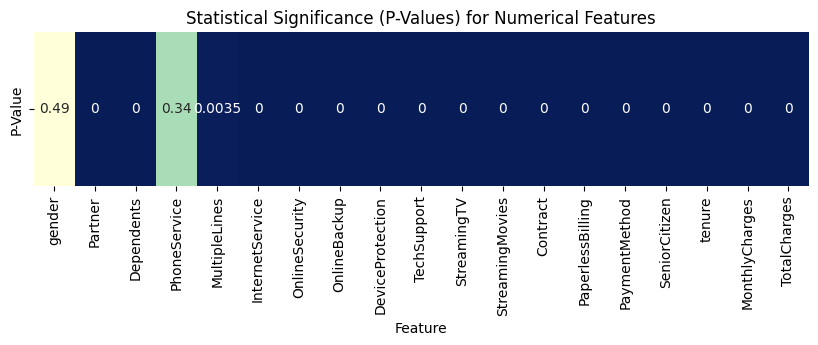

In [158]:
p_df = pd.DataFrame(list(p_dict.items()), columns=['Feature', 'P-Value']).set_index('Feature')
print(p_df)
plt.figure(figsize=(10, 2))
sns.heatmap(p_df.T, annot=True, cmap="YlGnBu_r", cbar=False)
plt.title("Statistical Significance (P-Values) for Numerical Features")
plt.show()

In [159]:
Data["customerID"].unique().size

7043